In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [186]:
df = pd.read_csv('credit_risk_dataset.csv')

In [187]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [188]:
df.shape

(32581, 12)

Análise descritiva da base

In [189]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


(array([2.693e+04, 4.891e+03, 6.510e+02, 8.900e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

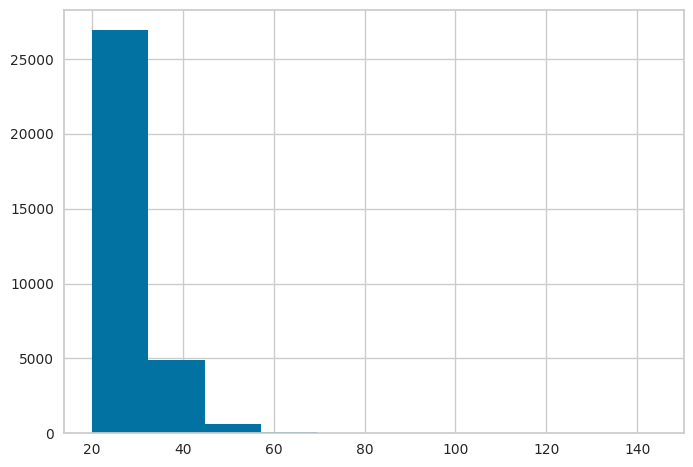

In [190]:
plt.hist(x=df['person_age'])

(array([1.9648e+04, 1.0626e+04, 1.6640e+03, 3.7100e+02, 1.3400e+02,
        4.1000e+01, 2.4000e+01, 1.4000e+01, 1.1000e+01, 9.0000e+00,
        7.0000e+00, 5.0000e+00, 9.0000e+00, 3.0000e+00, 5.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

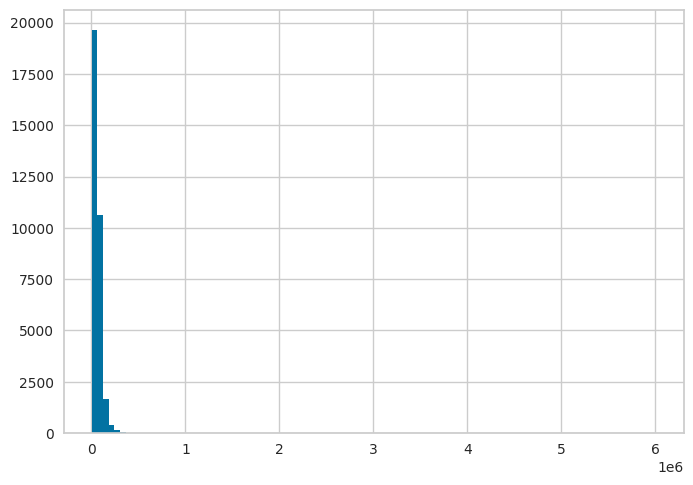

In [191]:
plt.hist(x=df['person_income'], bins=100)

(array([5.250e+02, 1.405e+03, 2.073e+03, 1.115e+03, 2.263e+03, 2.884e+03,
        2.624e+03, 1.665e+03, 2.310e+03, 1.319e+03, 6.820e+02, 3.076e+03,
        6.340e+02, 2.065e+03, 5.400e+02, 6.680e+02, 1.813e+03, 6.250e+02,
        1.470e+02, 2.840e+02, 5.310e+02, 1.270e+02, 1.072e+03, 1.960e+02,
        1.620e+02, 4.700e+01, 7.600e+01, 3.900e+02, 8.180e+02, 1.700e+01,
        1.300e+01, 7.700e+01, 2.000e+00, 1.200e+01, 1.050e+02, 6.000e+00,
        1.300e+01, 8.000e+00, 6.000e+00, 1.860e+02]),
 array([  500. ,  1362.5,  2225. ,  3087.5,  3950. ,  4812.5,  5675. ,
         6537.5,  7400. ,  8262.5,  9125. ,  9987.5, 10850. , 11712.5,
        12575. , 13437.5, 14300. , 15162.5, 16025. , 16887.5, 17750. ,
        18612.5, 19475. , 20337.5, 21200. , 22062.5, 22925. , 23787.5,
        24650. , 25512.5, 26375. , 27237.5, 28100. , 28962.5, 29825. ,
        30687.5, 31550. , 32412.5, 33275. , 34137.5, 35000. ]),
 <BarContainer object of 40 artists>)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

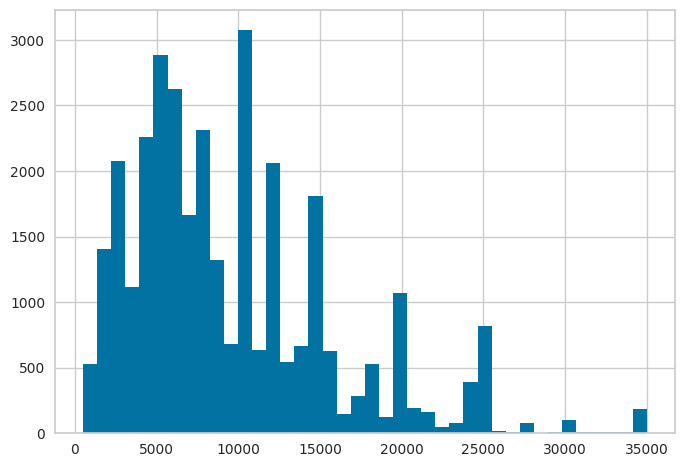

In [192]:
plt.hist(x=df['loan_amnt'], bins=40)

<AxesSubplot: xlabel='loan_status', ylabel='count'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

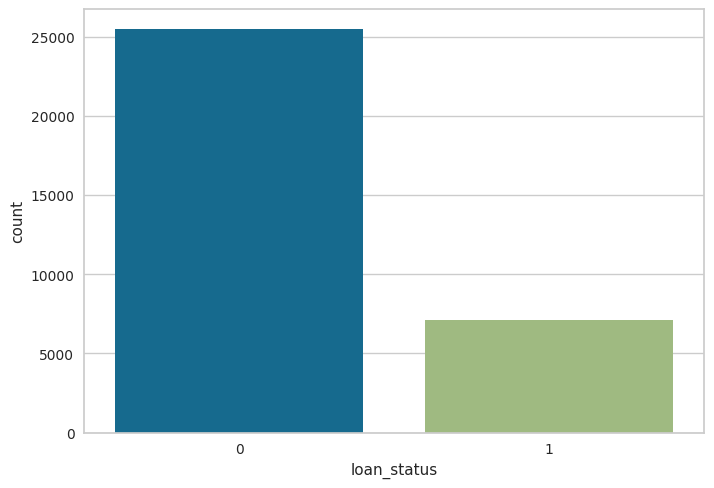

In [193]:
sns.countplot(x=df['loan_status'])

Selecionando as colunas de interesse

In [194]:
df_col = df[['person_age', 'person_income', 'loan_amnt', 'loan_status']]

In [195]:
df_col.head()

,person_age,person_income,loan_amnt,loan_status
0,22,59000,35000,1
1,21,9600,1000,0
2,25,9600,5500,1
3,23,65500,35000,1
4,24,54400,35000,1


Divisão entre previsores e classe

In [196]:
X_credit = df_col.iloc[:,0:3].values

In [197]:
X_credit

array([[    22,  59000,  35000],
       [    21,   9600,   1000],
       [    25,   9600,   5500],
       ...,
       [    65,  76000,  35000],
       [    56, 150000,  15000],
       [    66,  42000,   6475]])

In [198]:
y_credit = df_col.iloc[:,3].values

In [199]:
y_credit

array([1, 0, 1, ..., 1, 0, 0])

Padronizando os dados previsores

In [200]:
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [201]:
X_credit

array([[-0.90337383, -0.11414329,  4.01940376],
       [-1.06090423, -0.91114671, -1.35864998],
       [-0.43078263, -0.91114671, -0.64684875],
       ...,
       [ 5.87043346,  0.16012914,  4.01940376],
       [ 4.45265984,  1.35402091,  0.85584274],
       [ 6.02796387, -0.38841572, -0.49262515]])

Divisão da base entre treinamento e teste

In [202]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(
    X_credit, y_credit, test_size = 0.25, random_state = 0)

In [203]:
X_credit_treinamento.shape, X_credit_teste.shape, y_credit_treinamento.shape, y_credit_teste.shape

((24435, 3), (8146, 3), (24435,), (8146,))

Treinamento do modelo Naive Bayes

In [204]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [205]:
naive_credit.classes_

array([0, 1])

In [206]:
previsao = naive_credit.predict(X_credit_teste)

In [207]:
previsao

array([0, 1, 0, ..., 0, 0, 0])

Teste do modelo Naive Bayes

In [208]:
accuracy_score(y_credit_teste, previsao)

0.7996562730174319

In [209]:
confusion_matrix(y_credit_teste, previsao)

array([[6345,  137],
       [1495,  169]])

0.7996562730174319

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

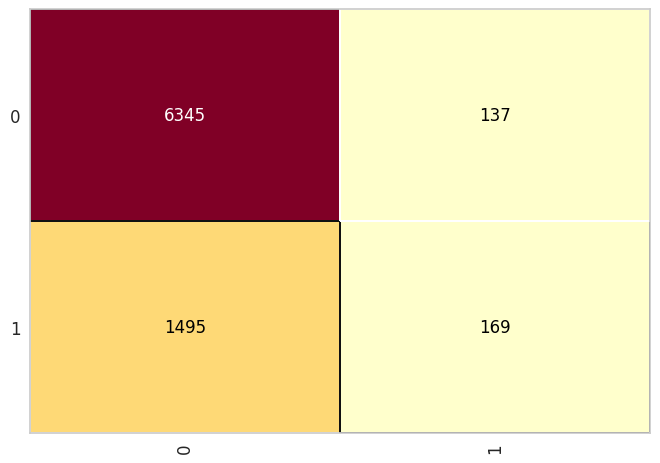

In [210]:
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [211]:
print(classification_report(y_credit_teste, previsao))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6482
           1       0.55      0.10      0.17      1664

    accuracy                           0.80      8146
   macro avg       0.68      0.54      0.53      8146
weighted avg       0.76      0.80      0.74      8146



### Orange

#### Preparando os dados para o Orange

In [212]:
df_orange = df[['person_income', 'person_age', 'loan_amnt', 'loan_status']]
df_orange.rename(columns={'loan_status': 'c#loan_status'}, inplace=True)
df_orange.head()

/tmp/ipykernel_377/2029360793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orange.rename(columns={'loan_status': 'c#loan_status'}, inplace=True)


,person_income,person_age,loan_amnt,c#loan_status
0,59000,22,35000,1
1,9600,21,1000,0
2,9600,25,5500,1
3,65500,23,35000,1
4,54400,24,35000,1


In [213]:
df_orange.to_csv('credit_risk_data_orange.csv', index=False)

In [235]:
import Orange

In [215]:
df2 = Orange.data.Table('credit_risk_data_orange.csv')

In [216]:
type(df2)

Orange.data.table.Table

In [217]:
df2.domain

[person_income, person_age, loan_amnt | loan_status]

In [218]:
df2_separated = Orange.evaluation.testing.sample(df2, n=0.25)

In [219]:
df2_separated

([[55000, 25, 6000 | 0],
  [26400, 25, 2500 | 0],
  [62000, 38, 12000 | 0],
  [350000, 28, 20000 | 0],
  [20112, 36, 3900 | 0],
  ...
 ],
 [[101000, 33, 5000 | 0],
  [22800, 33, 2000 | 0],
  [231252, 27, 2000 | 0],
  [54566, 22, 4000 | 0],
  [205000, 24, 35000 | 0],
  ...
 ])

In [223]:
df2_treinamento = df2_separated[1]
df2_teste = df2_separated[0]

In [224]:
len(df2_treinamento), len(df2_teste)

(24436, 8145)

#### Treinamento de indução de regras

In [236]:
cn2 = Orange.classification.MajorityLearner()
#regras_credit = cn2(df2_treinamento)

ImportError: cannot import name '_check_weights' from 'sklearn.neighbors._base' (/home/marcela/.virtualenvs/riscocredito/lib/python3.8/site-packages/sklearn/neighbors/_base.py)

In [230]:
print(Orange.__version__)

3.34.1
